# Using notes' topic mixtures as features to develop models for predicting length of MV

In [2]:
import pandas as pd
import numpy as np

## Read data

In [3]:
train_mixture_filename = r'/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_res_15_thre_d2/infer/train.csv'
train_duration_filename = r'/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_res_15_thre_d2/train_bi_vent.txt'
# valid_mixture_filename = r'/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_res_other_15_thre_d2/infer/validation.csv'
# valid_duration_filename = r'/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_res_other_15_thre_d2/validation_vent.txt'
test_mixture_filename = r'/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_res_15_thre_d2/infer/test.csv'
test_duration_filename = r'/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_res_15_thre_d2/test_bi_vent.txt'

In [4]:
train_mixtures = pd.read_csv(train_mixture_filename, header=None)
bi_train_duration = pd.read_csv(train_duration_filename, header=None, sep=' ')
bi_train_duration = bi_train_duration[1].astype(int)
# valid_mixtures = pd.read_csv(valid_mixture_filename, header=None)
# valid_duration = pd.read_csv(valid_duration_filename, header=None, sep=' ')
# valid_duration = valid_duration[1].astype(np.float64)
test_mixtures = pd.read_csv(test_mixture_filename, header=None)
bi_test_duration = pd.read_csv(test_duration_filename, header=None, sep=' ')
bi_test_duration = bi_test_duration[1].astype(int)

In [14]:
train_mixtures.shape

(1545, 50)

In [15]:
bi_train_duration.shape

(1545,)

In [16]:
bi_train_duration[0:10]

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    0
8    0
9    1
Name: 1, dtype: int64

## Convert to binarized duration

In [94]:
bi_train_duration = (train_duration > 7 * 24).astype(int)
bi_valid_duration = (valid_duration > 7 * 24).astype(int)
bi_test_duration = (test_duration > 7 * 24).astype(int)

## Logistic regression

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, average_precision_score, precision_recall_curve

In [18]:
lr = LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=200)

In [19]:
lr.fit(train_mixtures, bi_train_duration)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=200, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
test_predictions_lr = lr.predict(test_mixtures)

In [22]:
print(average_precision_score(bi_test_duration, test_predictions_lr))
print(classification_report(bi_test_duration, test_predictions_lr))

0.5344561688311689
              precision    recall  f1-score   support

           0       0.71      0.72      0.72        89
           1       0.61      0.60      0.60        65

    accuracy                           0.67       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.67      0.67      0.67       154



## Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
GNB = GaussianNB()

In [25]:
GNB.fit(train_mixtures, bi_train_duration)

GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
test_predictions_GNB = GNB.predict(test_mixtures)

In [27]:
print(average_precision_score(bi_test_duration, test_predictions_GNB))
print(classification_report(bi_test_duration, test_predictions_GNB))

0.45545224006762464
              precision    recall  f1-score   support

           0       0.65      0.46      0.54        89
           1       0.47      0.66      0.55        65

    accuracy                           0.55       154
   macro avg       0.56      0.56      0.55       154
weighted avg       0.58      0.55      0.54       154



## SVM

### Linear SVM

In [28]:
from sklearn.svm import LinearSVC

In [29]:
lsvm = LinearSVC()

In [30]:
lsvm.fit(train_mixtures, bi_train_duration)

/home/mcb/li_lab/zwen8/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [31]:
test_predictions_lsvm = lsvm.predict(test_mixtures)

In [33]:
print(average_precision_score(bi_test_duration, test_predictions_lsvm))
print(classification_report(bi_test_duration, test_predictions_lsvm))

0.4116853734500793
              precision    recall  f1-score   support

           0       0.56      0.54      0.55        89
           1       0.40      0.42      0.41        65

    accuracy                           0.49       154
   macro avg       0.48      0.48      0.48       154
weighted avg       0.49      0.49      0.49       154



### Non-linear SVM

In [34]:
from sklearn.svm import SVC

In [35]:
svm = SVC()

In [36]:
svm.fit(train_mixtures, bi_train_duration)

/home/mcb/li_lab/zwen8/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [38]:
test_predictions_svm = svm.predict(test_mixtures)

In [40]:
print(average_precision_score(bi_test_duration, test_predictions_svm))
print(classification_report(bi_test_duration, test_predictions_svm))

0.5020979020979022
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        89
           1       1.00      0.14      0.24        65

    accuracy                           0.64       154
   macro avg       0.81      0.57      0.50       154
weighted avg       0.78      0.64      0.54       154



## Grid Search LR
Logistic regression seems to be the best classifier. See how good it can be.

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
estimator = LogisticRegression(solver='liblinear', class_weight='balanced')

In [58]:
hyperparams = {
    'C': np.arange(0.6, 1.0, step=0.01),
    'max_iter': [100, 200, 300]
              }

In [59]:
searcher = GridSearchCV(estimator=estimator, n_jobs=12, param_grid=hyperparams, scoring='average_precision', cv=5)

In [60]:
searcher.fit(train_mixtures, bi_train_duration)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=12,
             param_grid={'C': array([0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 ,
       0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81,
       0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92,
       0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
                         'max_iter

In [61]:
print(searcher.best_params_)

{'C': 0.8800000000000002, 'max_iter': 100}


In [62]:
print(searcher.best_score_)

0.5081135923225946


In [63]:
test_predictions_lrbest = searcher.best_estimator_.predict(test_mixtures)

In [64]:
print(average_precision_score(bi_test_duration, test_predictions_lrbest))
print(classification_report(bi_test_duration, test_predictions_lrbest))

0.5344561688311689
              precision    recall  f1-score   support

           0       0.71      0.72      0.72        89
           1       0.61      0.60      0.60        65

    accuracy                           0.67       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.67      0.67      0.67       154



In [65]:
test_proba_lrbest = searcher.best_estimator_.predict_proba(test_mixtures)[:, 1]
precision, recall, _ = precision_recall_curve(bi_test_duration, test_proba_lrbest, pos_label=1)

In [33]:
import matplotlib.pyplot as plt

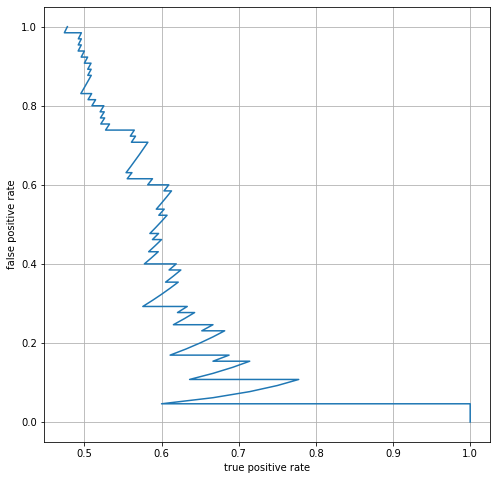

In [69]:
plt.figure(figsize=(8, 8))
plt.plot(precision, recall)
plt.xlabel('true positive rate')
plt.ylabel('false positive rate')
plt.grid()

## Try AdaBoost

In [1]:
from sklearn.ensemble import AdaBoostClassifier

In [6]:
ada = AdaBoostClassifier(base_estimator=LogisticRegression(solver='liblinear', C=1.5, max_iter=100, class_weight='balanced'), random_state=1)

In [7]:
ada.fit(train_mixtures, bi_train_duration)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.5,
                                                     class_weight='balanced',
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='warn',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='liblinear',
                                                     tol=0.0001, verbose=0,
                                                     warm_start=False),
                   learning_r

In [9]:
test_predictions_ada = ada.predict(test_mixtures)

In [28]:
print(average_precision_score(bi_test_duration, test_predictions_ada))
print(classification_report(bi_test_duration, test_predictions_ada))

0.5215204150688022
              precision    recall  f1-score   support

           0       0.70      0.72      0.71        89
           1       0.60      0.57      0.58        65

    accuracy                           0.66       154
   macro avg       0.65      0.64      0.64       154
weighted avg       0.65      0.66      0.65       154



## Try MLP (non-linear classifier)

In [11]:
from sklearn.neural_network import MLPClassifier

In [59]:
mlp = MLPClassifier(hidden_layer_sizes=(40, 30),
                   activation='relu',
#                    solver='lbfgs',
                   early_stopping=False,
                   max_iter=300,
                   random_state=1,
                   n_iter_no_change=20,
                   verbose=False)

In [60]:
mlp.fit(train_mixtures, bi_train_duration)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(40, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=300, momentum=0.9,
              n_iter_no_change=20, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [61]:
mlp.n_iter_

213

In [62]:
test_predictions_mlp = mlp.predict(test_mixtures)

In [63]:
print(average_precision_score(bi_test_duration, test_predictions_mlp))
print(classification_report(bi_test_duration, test_predictions_mlp))

0.9293030046876202
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        89
           1       0.95      0.95      0.95        65

    accuracy                           0.96       154
   macro avg       0.96      0.96      0.96       154
weighted avg       0.96      0.96      0.96       154



In [64]:
test_proba_mlp = mlp.predict_proba(test_mixtures)[:, 1]
mlp_precision, mlp_recall, _ = precision_recall_curve(bi_test_duration, test_proba_mlp, pos_label=1)

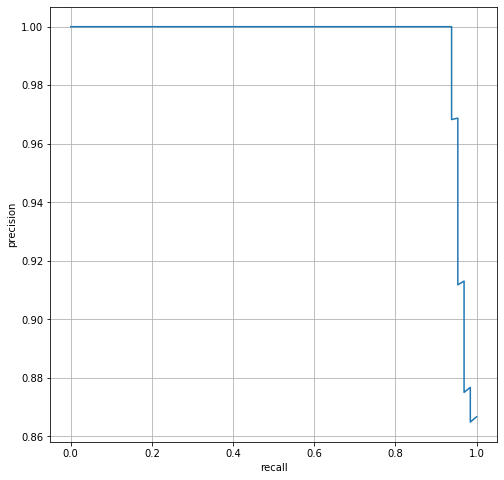

In [65]:
plt.figure(figsize=(8, 8))
plt.plot(mlp_recall, mlp_precision)
# plt.fill_between(mlp_recall, mlp_precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid()